## Úkol
Implementujte Gaussovský filtr za pomoci ručně nastavených vah v konvoluční vrstvě z nn modulu.

1. Vygenerujte 2D gaussovský perátor. (3b)
1. Vizualizujte operátor. (1b)
1. Proveďte konvoluci na vstupního obrázku pomocí tohoto operátoru. (4b)
1. Zobrazte výstup. (1b)
1. Co tento kernel s obrázkem provedl? (1b)

**BONUS:** Obdobně vytvořte i další maskové operátory používané pro zpracování obrázků, např. Laplacian pro zvýrazdění hran. (viz [wikipedia (en)](https://en.wikipedia.org/wiki/Kernel_(image_processing))) (+1b)

In [1]:
import numpy as np
import torch
import torchvision.transforms as T
import math

from PIL import Image
import matplotlib.pyplot as plt

# Načtení obrázku

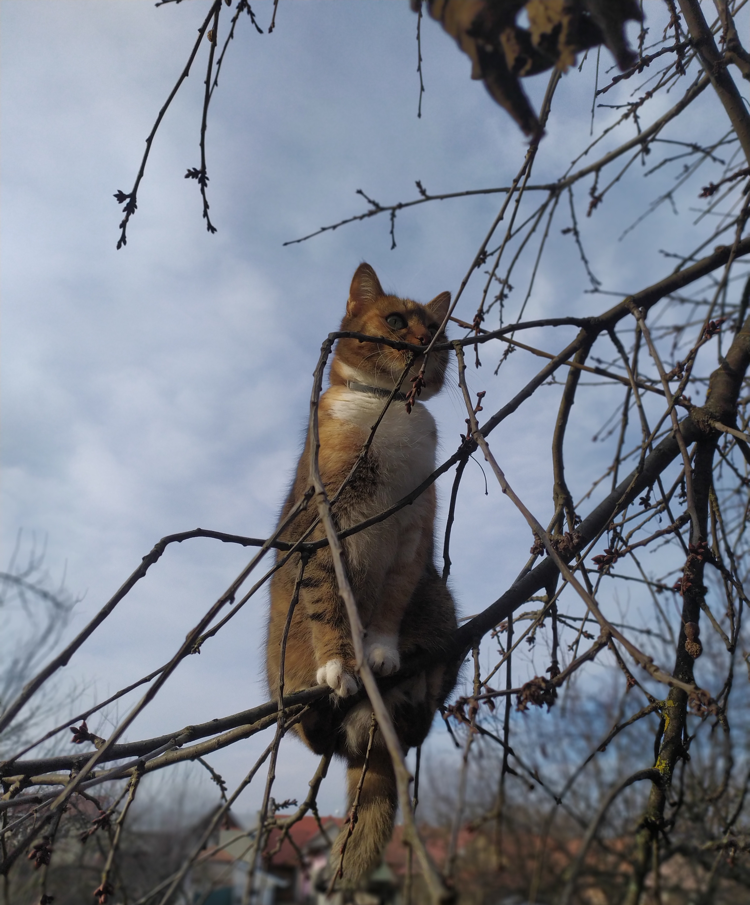

In [6]:
# Načtení obrázku pomocí PIL a zmenší jeho velikost x4
img = Image.open('input_img.jpg')
new_size = (img.size[0] // 4, img.size[1] // 4) 
img = img.resize(new_size)

# Zobrazení obrázku
display(img)

In [8]:
# převedení obrázku na tenzor
img_t = T.ToTensor()(img)
print("Size of imgae:", img_t.size())

# rozšíření dimenze obrázku na 4D tensor,
# přidáváme dimenzi pro dávku (batch)
img_t = img_t.unsqueeze(0)
print("Size of imgae:", img_t.size())

Size of imgae: torch.Size([3, 905, 750])
Size of imgae: torch.Size([1, 3, 905, 750])


# Obecná funkce pro vygenerování gaussovkého operatoru

In [9]:
def generate_gaussian_kernel(size: int, sigma: float) -> np.array:
    """
    Vygenerujte 2D gaussovský operátor

    Parametry:
        size - Velikost kernelu / matice
        sigma - rozptyl

    Return: gaussovský operátor
    """
    kernel = np.zeros((size, size), dtype=np.float32)
    center = size // 2
    
    # výpočet koeficientů pro gaussovskou funkci
    coeff = 1 / (2 * math.pi * sigma ** 2)
    exp_coeff = 1 / (2 * sigma ** 2)
    
    # generování koeficientů do kernelu
    for i in range(size):
        for j in range(size):
            distance = (i - center) ** 2 + (j - center) ** 2
            kernel[i][j] = coeff * math.exp(-distance * exp_coeff)
            
    # normalizace kernelu (součet všech koeficientu = 1.0)
    kernel = kernel / np.sum(kernel)
    
    return kernel

# Gaussovský operátor

Size of matrix:  (13, 13)


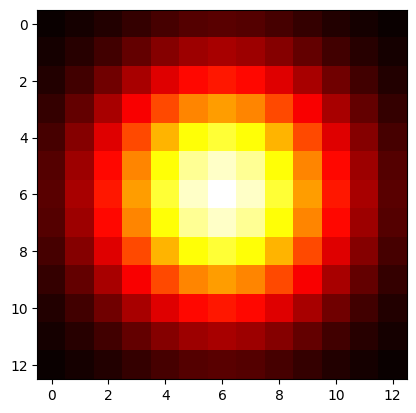

In [10]:
# Vytvoření Gaussovského filtru
gaussian = generate_gaussian_kernel(13, 3)
print("Size of matrix: ", gaussian.shape)

# Vykreslení gaussovského filtru
plt.imshow(gaussian, cmap='hot')
plt.show()

Velikost obrázku: torch.Size([3, 893, 738])


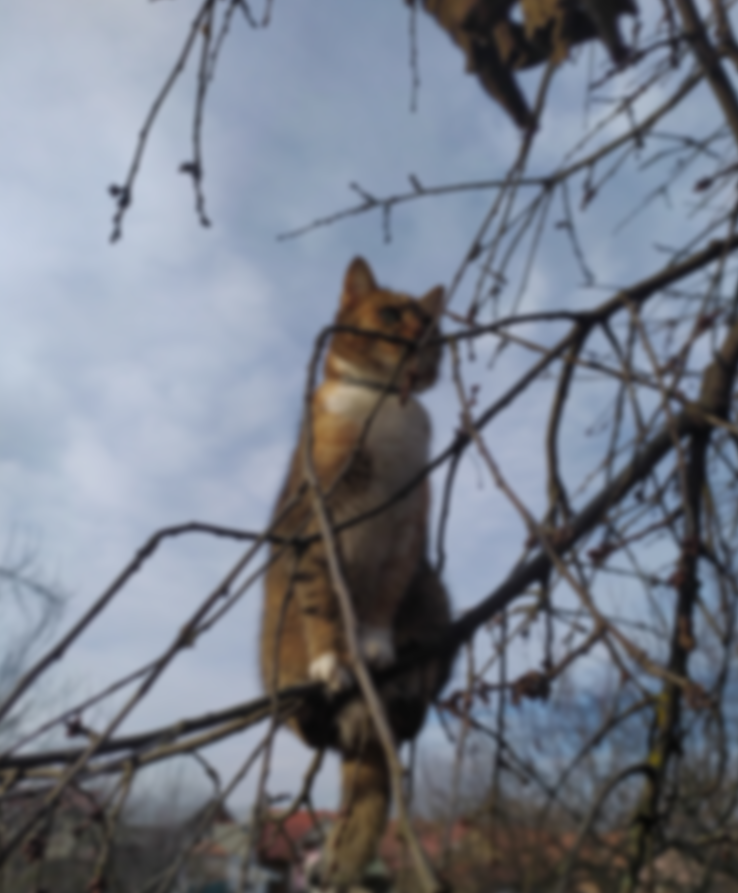

In [11]:
# definice konvoluční sítě
conv = torch.nn.Conv2d(in_channels=3, out_channels=3, kernel_size=gaussian.shape[0], stride=(1, 1), bias=None, groups=3)

# nastavení vah
conv.weight.data.copy_(torch.from_numpy(gaussian))

# aplikace konvolucen na obrázek
out_t = conv(img_t)
    
# zrušení rozšířené dimenze pro batch
out_img = out_t.squeeze(0)
print("Velikost obrázku:", out_img.size())

# převedení z PyTorch tensoru na PIL obrázek + zobrazení
out_img = T.ToPILImage()(out_img)
display(out_img)

# Laplacian operátor

Velikost matice:  (3, 3)


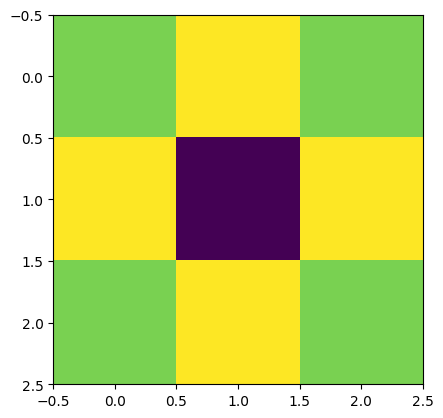

In [12]:
# Vytvoření Gaussovského filtru
laplacian = np.array([
    [0, 1, 0],
    [1, -4, 1],
    [0, 1, 0]
])
print("Velikost matice: ", laplacian.shape)

# Vykreslení gaussovského filtru
plt.imshow(laplacian)
plt.show()

Velikost obrázku: torch.Size([3, 903, 748])


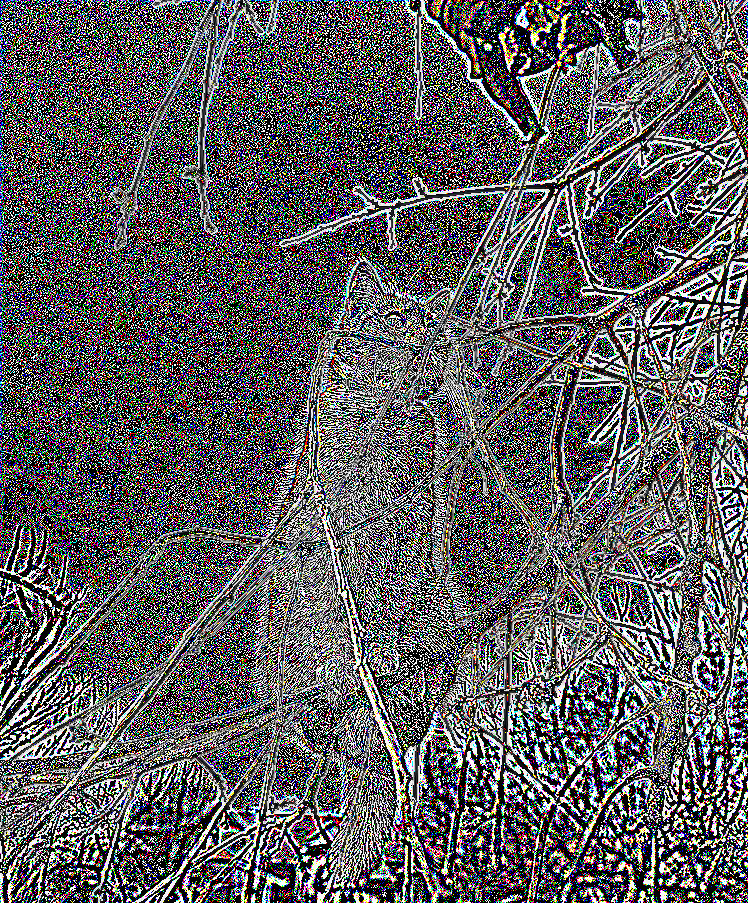

In [13]:
# definice konvoluční sítě
conv = torch.nn.Conv2d(in_channels=3, out_channels=3, kernel_size=laplacian.shape[0], stride=(1, 1), bias=None, groups=3)

# nastavení vah
conv.weight.data.copy_(torch.from_numpy(laplacian))

# aplikace konvolucen na obrázek
out_t = conv(img_t)
    
# zrušení rozšířené dimenze pro batch
out_img = out_t.squeeze(0)
print("Velikost obrázku:", out_img.size())

# převedení z PyTorch tensoru na PIL obrázek + zobrazení
out_img = T.ToPILImage()(out_img)
display(out_img)

# Závěr

Výsledný obrázek po aplikaci gaussovského operatoru byl rozmazán a vyhlazen. To odpovídá očekávanému efektu gaussovského filtru a i mému předpokladu. Výsledný obraz se lišil od původního obrázku výrazně jelikož jsem nastavil vyšší hodnotu rozptylu __sigma__, aby byl efekt výraznější. 

Myslím si, že tento efekt rozmazání je zpusoben tím, že barva výsledneho pixelu je ovlivněna okolními pixely. Jak moc okolní pixel ovlivní výslednou barvu pixelu zaleží na váze v kernelu. Výhy se snižují se vzdálenosti od středu v závislosti na gaussově křivce.

Jako bonus jsem vytvořil i Laplacian filter. 